# Basics of Keras in Tensorflow

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

* The data is custom made for a hypotethical clinical new drug test in 2100 individuals which consists a group of people who are younger than 65 years of age and another group with equal number of people who are 65 years of age or older.
* Around 95% of patients who are 65 and older exprienced side effects.
* Around 95% of pateints who are under 65 years of age experienced no side effects.


In [2]:
X = [] # input data
Y = [] # label

In [3]:
# Creating the outliers
total_patients = 2100
no_of_outliers = int(5 / 100 * total_patients)
print(no_of_outliers)
for i in range(no_of_outliers):
    # ~5% of young patients who experienced side effects.
    random_young_age_patient = randint(13, 64)
    X.append(random_young_age_patient)
    Y.append(1)
    
    # ~5% of old patients who did not experience side effects
    random_old_age_patient = randint(65, 100)
    X.append(random_old_age_patient)
    Y.append(0)

105


In [4]:
# Rest of patients apart from outliers
no_of_non_outliers = 2100 - no_of_outliers
for i in range(no_of_non_outliers):
    # ~95% of young patients who did not experience side effetcs.
    random_young_age_patient = randint(13, 64)
    X.append(random_young_age_patient)
    Y.append(0)
    
    # ~95% of old patients who experienced side effects.
    random_old_age_patient = randint(65, 100)
    X.append(random_old_age_patient)
    Y.append(1)

In [7]:
# Converting the lists to np arrays.
X = np.array(X)
Y = np.array(Y)
X, Y = shuffle(X, Y)

In [8]:
X_test = []
Y_test = []

for i in range(50):
    # ~5% of young patients who experienced side effects.
    random_young_age_patient = randint(13, 64)
    X_test.append(random_young_age_patient)
    Y_test.append(1)
    
    # ~5% of old patients who did not experience side effects
    random_old_age_patient = randint(65, 100)
    X_test.append(random_old_age_patient)
    Y_test.append(0)

for i in range(950):
    # ~95% of young patients who did not experience side effetcs.
    random_young_age_patient = randint(13, 64)
    X_test.append(random_young_age_patient)
    Y_test.append(0)
    
    # ~95% of old patients who experienced side effects.
    random_old_age_patient = randint(65, 100)
    X_test.append(random_old_age_patient)
    Y_test.append(1)

In [10]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test, Y_test = shuffle(X_test, Y_test)

In [12]:
scaler = MinMaxScaler(feature_range = (0, 1))
# data should not be 1D for fit_transfor
scaled_X = scaler.fit_transform(X.reshape(-1, 1))
scaled_X_test = scaler.fit_transform(X_test.reshape(-1, 1))

### Simple tf.keras Sequnetial Model

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [14]:
physical_devices = tf.config.experimental.list_logical_devices('GPU')
print("No Of GPUs = ", len(physical_devices))
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

No Of GPUs =  0


In [15]:
# Creating Fully Connected Layers. 
model = Sequential([
    Dense(units = 16, input_shape = (1, ), activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [18]:
model.fit(x=scaled_X, y=Y, batch_size=10, validation_split = 0.1, epochs=30, shuffle = True, verbose=2)

Epoch 1/30
378/378 - 1s - loss: 1.1171 - accuracy: 0.6447 - val_loss: 0.5329 - val_accuracy: 0.7500
Epoch 2/30
378/378 - 0s - loss: 0.4841 - accuracy: 0.8048 - val_loss: 0.5334 - val_accuracy: 0.7024
Epoch 3/30
378/378 - 0s - loss: 0.4159 - accuracy: 0.8468 - val_loss: 0.3946 - val_accuracy: 0.8619
Epoch 4/30
378/378 - 0s - loss: 0.3593 - accuracy: 0.8807 - val_loss: 0.3662 - val_accuracy: 0.8571
Epoch 5/30
378/378 - 0s - loss: 0.3384 - accuracy: 0.8886 - val_loss: 0.3732 - val_accuracy: 0.8786
Epoch 6/30
378/378 - 0s - loss: 0.3389 - accuracy: 0.8804 - val_loss: 0.3587 - val_accuracy: 0.8524
Epoch 7/30
378/378 - 0s - loss: 0.3069 - accuracy: 0.9011 - val_loss: 0.3976 - val_accuracy: 0.8095
Epoch 8/30
378/378 - 0s - loss: 0.3153 - accuracy: 0.8915 - val_loss: 0.3825 - val_accuracy: 0.8476
Epoch 9/30
378/378 - 0s - loss: 0.3018 - accuracy: 0.9024 - val_loss: 0.3141 - val_accuracy: 0.9048
Epoch 10/30
378/378 - 0s - loss: 0.2882 - accuracy: 0.9111 - val_loss: 0.3712 - val_accuracy: 0.8429

### Predict

In [19]:
prediction = model.predict(x=scaled_X_test, batch_size=10, verbose=0)

In [20]:
for i in prediction[::50]:
    print(i)

[0.9489288  0.05107124]
[0.95346415 0.0465358 ]
[0.9537077  0.04629223]
[0.949882   0.05011805]
[0.9520684  0.04793164]
[0.9497099 0.0502901]
[0.95451087 0.0454891 ]
[0.9549075  0.04509252]
[0.9499678  0.05003224]
[0.9539501  0.04604989]
[0.9545905  0.04540951]
[0.9484898  0.05151015]
[0.9547492  0.04525075]
[0.9538695  0.04613053]
[0.94919044 0.05080959]
[0.95231473 0.04768526]
[0.950139   0.04986103]
[0.94962364 0.05037633]
[0.9526435 0.0473565]
[0.9514888  0.04851121]
[0.9551438  0.04485615]
[0.9497099 0.0502901]
[0.95305556 0.04694443]
[0.955379   0.04462098]
[0.94866586 0.05133417]
[0.95056456 0.04943543]
[0.9532194  0.04678059]
[0.95338273 0.04661727]
[0.94953734 0.05046269]
[0.95064926 0.04935072]
[0.955379   0.04462098]
[0.9550652  0.04493481]
[0.9547492  0.04525075]
[0.9551438  0.04485615]
[0.95346415 0.0465358 ]
[0.9549075  0.04509252]
[0.9503096  0.04969038]
[0.94927734 0.05072265]
[0.94945073 0.05054922]
[0.9529735  0.04702659]


In [21]:
rounded_pred = np.argmax(prediction, axis=-1)

In [22]:
for i in rounded_pred[::50]:
    print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## Confusion Matrix

In [23]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [24]:
cm = confusion_matrix(y_true= Y_test, y_pred=rounded_pred)

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[305   0]
 [305   0]]


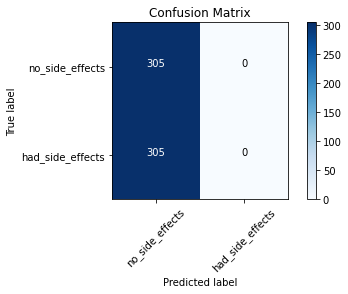

In [22]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Saving a model

In [26]:
import os.path
if not os.path.isfile('models/medical_trail.h5'):
    model.save('models/medical_trail.h5')